In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
file_path = "../dataset/data.csv"  # Update this path to the actual location of your CSV file
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [2]:
# Step 2: Drop the 'IsHoliday' column and define independent (X) and dependent (y) variables
X = data.drop(columns=['Weekly_Sales', 'IsHoliday'])
y = data['Weekly_Sales']

# Step 3: Train/test split and train the Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Try Random Forest for improved accuracy
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [4]:
# Step 4: Evaluate the model
y_pred = model.predict(X_test)

In [5]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 3280.13
MAE: 1551.66
MAPE: 955.58%


In [6]:
# Step 4: Get feature importance and associate them with column names
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print the feature importance for each variable
print(coef_df)


        Variable  Importance
1           Dept    0.629570
2           Size    0.193323
0          Store    0.074506
10           CPI    0.036613
3    Temperature    0.019475
11  Unemployment    0.017696
4     Fuel_Price    0.014054
7      MarkDown3    0.006885
6      MarkDown2    0.002228
9      MarkDown5    0.002010
8      MarkDown4    0.001966
5      MarkDown1    0.001676


In [7]:
# Step 5: Predict sales for Store 1 and Dept 1
store_1_dept_1 = data[(data['Store'] == 1) & (data['Dept'] == 1)]
X_store_dept = store_1_dept_1.drop(columns=['Weekly_Sales', 'IsHoliday'])

# Predict sales for Store 1 and Dept 1
store_dept_sales_pred = model.predict(X_store_dept)

# Actual sales for Store 1 and Dept 1
store_dept_sales_actual = store_1_dept_1['Weekly_Sales']

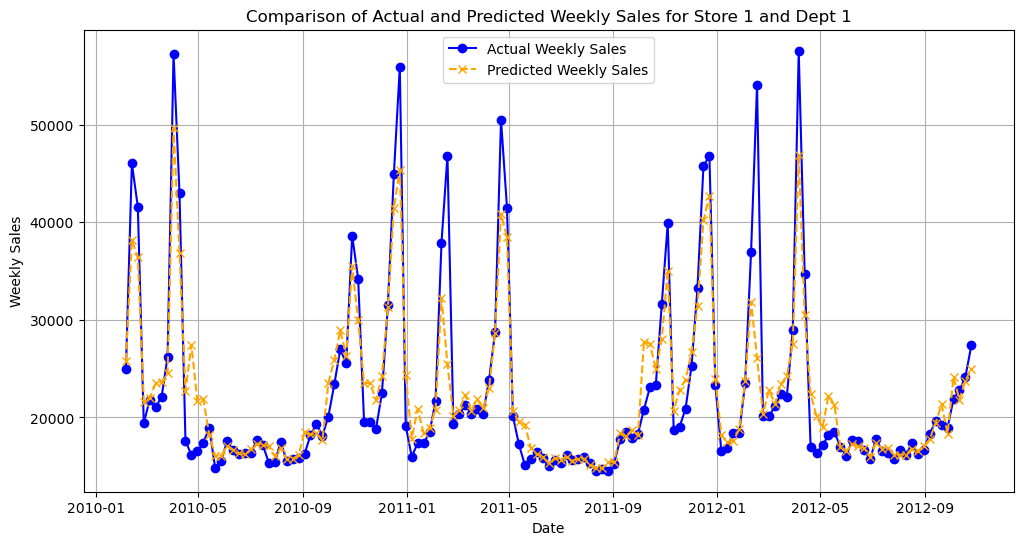

In [8]:
# Step 6: Plot actual vs predicted sales for Store 1 and Dept 1
plt.figure(figsize=(12, 6))
plt.plot(store_1_dept_1.index, store_dept_sales_actual, label='Actual Weekly Sales', color='blue', marker='o', linestyle='-')
plt.plot(store_1_dept_1.index, store_dept_sales_pred, label='Predicted Weekly Sales', color='orange', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Actual and Predicted Weekly Sales for Store 1 and Dept 1')
plt.legend()
plt.grid()
plt.show()

In [9]:
# Step 7: Predict next two weeks (assuming we know external factors for these weeks)
# Get the last date from the data
last_date = store_1_dept_1.index.max()

# Create a list of the next two weekly dates
next_two_weeks = pd.date_range(start=last_date, periods=3, freq='W')[1:]

# Create a new DataFrame with the features for the next two weeks
new_data = pd.DataFrame({
    'Store': [1, 1],
    'Dept': [1, 1],
    'Size': [store_1_dept_1['Size'].mean(), store_1_dept_1['Size'].mean()],  # Use the mean size for predictions
    'Temperature': [60.0, 58.0],  # Example temperatures for the next two weeks
    'Fuel_Price': [3.5, 3.6],     # Example fuel prices for the next two weeks
    'MarkDown1': [0.0, 0.0],
    'MarkDown2': [0.0, 0.0],
    'MarkDown3': [0.0, 0.0],
    'MarkDown4': [0.0, 0.0],
    'MarkDown5': [0.0, 0.0],
    'CPI': [211.0, 211.0],
    'Unemployment': [8.0, 8.0]
}, index=next_two_weeks)

In [10]:
# Predict sales for the next two weeks
predicted_sales_next_2_weeks = model.predict(new_data)

# Add the predicted sales to the DataFrame
new_data['Predicted_Weekly_Sales'] = predicted_sales_next_2_weeks

# Print the predicted sales for the next two weeks
print("Predicted Weekly Sales for the next 2 weeks:")
print(new_data[['Predicted_Weekly_Sales']])

Predicted Weekly Sales for the next 2 weeks:
            Predicted_Weekly_Sales
2012-11-04             28091.98075
2012-11-11             28094.55875


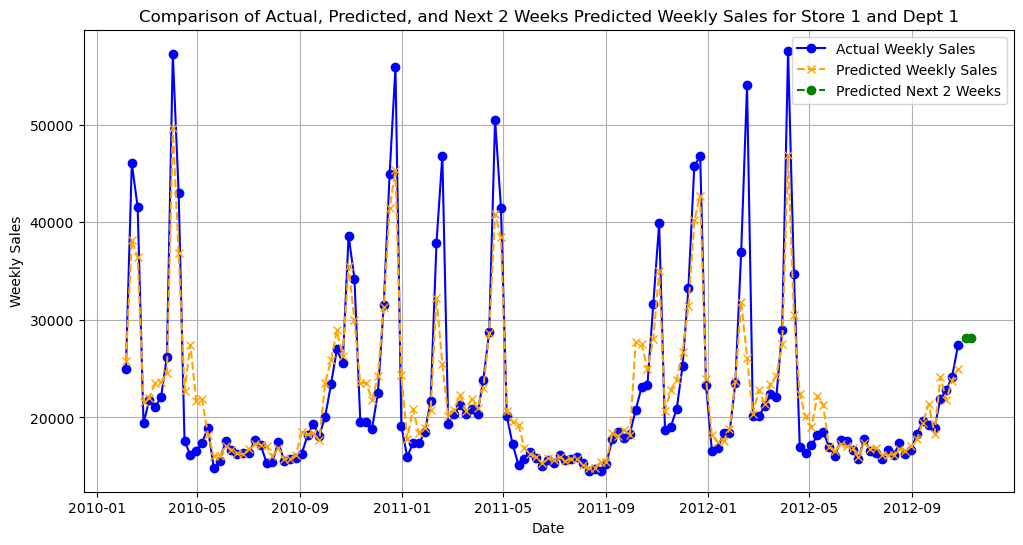

In [11]:
# Step 8: Plot predicted sales for the next two weeks
plt.figure(figsize=(12, 6))
plt.plot(store_1_dept_1.index, store_dept_sales_actual, label='Actual Weekly Sales', color='blue', marker='o', linestyle='-')
plt.plot(store_1_dept_1.index, store_dept_sales_pred, label='Predicted Weekly Sales', color='orange', marker='x', linestyle='--')
plt.plot(new_data.index, new_data['Predicted_Weekly_Sales'], label='Predicted Next 2 Weeks', color='green', marker='o', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Actual, Predicted, and Next 2 Weeks Predicted Weekly Sales for Store 1 and Dept 1')
plt.legend()
plt.grid()
plt.show()